# Survey Report Analysis

The provided is the clustering of People based on their Big5 personality survey.
The columns[questions] are grouped based on the personality type and is encoded to a variable, where each response to a question is considered as a column. The increased dimensions are reduced by finding the principal components, and are plotted in a graph to visualize the result.
The results are quite good considering the less number of data points. The advantage is that the same model can be used irrespective of the number of people under study, and larger the data more explanatory will be the model for further insight generation. The current analysis groups people based on Agreeableness, Extrovertion and Conscientiousness individually. 
The analysis can be further extended grouping personality types together or all of them to further segment people to 
identify further similarities.

The steps taken along with code has been documented below

#  Data Loading and Formatting

In [ ]:
## Importing required libraries. pandas as scikit-learn are the only required libraries

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [100]:
## Segregating questions based on the personality type

agreeablenessCols = ['Am interested in people.', 'Feel little concern for others.', 'Sympathize with others feelings.',
                     'Am not interested in other peoples problems.', 'Am not really interested in others.',
                     'Take time out for others.', 'Feel others emotions.', 'Make people feel at ease.']

conscientiousness = ['Am always prepared.', 'Leave my belongings around.', 'Pay attention to details.',
                     'Make a mess of things.', 'Get chores done right away.', 'Often forget to put things back in their proper place.',
                     'Like order.', 'Shirk my duties.', 'Follow a schedule.', 'Am exacting in my work.']


extrovertionCols = ['Am the life of the party.', 'Dont talk a lot.', 'Feel comfortable around people.',
                    'Keep in the background.', 'Start conversations.', 'Have little to say.', 'Talk to a lot of different people at parties.',
                    'Am quick to understand things.', 'Dont like to draw attention to myself.', 
                    'Dont mind being the center of attention.', 'Am quiet around strangers.']

openness = ['Have difficulty understanding abstract ideas.', 'Have a vivid imagination.', 'Am not interested in abstract ideas.',
                'Have excellent ideas.', 'Do not have a good imagination.', 'Spend time reflecting on things.', 
                'Am full of ideas.', 'Use difficult words.', 'Have a rich vocabulary.']

neuroticismCols = ['Get stressed out easily.', 'Am relaxed most of the time.', 'Insult people.', 'Worry about things.',
                   'Seldom feel blue.', 'Am easily disturbed.', 'Have a soft heart.', 'Get upset easily.',
                   'Change my mood a lot.', 'Have frequent mood swings.', 'Get irritated easily.', 'Often feel blue.']

other = ['reportLink', 'sex', 'age', 'country']

In [110]:
renamedColumns = agreeablenessCols + conscientiousness + extrovertionCols + openness + neuroticismCols + other
dropCols = extrovertionCols + openness + neuroticismCols + other
print((dropCols))

['Am the life of the party.', 'Dont talk a lot.', 'Feel comfortable around people.', 'Keep in the background.', 'Start conversations.', 'Have little to say.', 'Talk to a lot of different people at parties.', 'Am quick to understand things.', 'Dont like to draw attention to myself.', 'Dont mind being the center of attention.', 'Am quiet around strangers.', 'Have difficulty understanding abstract ideas.', 'Have a vivid imagination.', 'Am not interested in abstract ideas.', 'Have excellent ideas.', 'Do not have a good imagination.', 'Spend time reflecting on things.', 'Am full of ideas.', 'Use difficult words.', 'Have a rich vocabulary.', 'Get stressed out easily.', 'Am relaxed most of the time.', 'Insult people.', 'Worry about things.', 'Seldom feel blue.', 'Am easily disturbed.', 'Have a soft heart.', 'Get upset easily.', 'Change my mood a lot.', 'Have frequent mood swings.', 'Get irritated easily.', 'Often feel blue.', 'reportLink', 'sex', 'age', 'country']


In [111]:
## The file has to have the column row removed before running this line

df = pd.read_csv('Report.csv', names = renamedColumns)

In [112]:
print(df.shape)
print(df.head())

(10, 54)
          Am interested in people.  Feel little concern for others.  \
0                    Very Accurate            Moderately Inaccurate   
1                  Very Inaccurate              Moderately Accurate   
2            Moderately Inaccurate            Moderately Inaccurate   
3  Neither Accurate Nor Inaccurate            Moderately Inaccurate   
4  Neither Accurate Nor Inaccurate  Neither Accurate Nor Inaccurate   

  Sympathize with others feelings.  \
0  Neither Accurate Nor Inaccurate   
1              Moderately Accurate   
2                    Very Accurate   
3              Moderately Accurate   
4  Neither Accurate Nor Inaccurate   

  Am not interested in other peoples problems.  \
0                        Moderately Inaccurate   
1                              Very Inaccurate   
2                              Very Inaccurate   
3                          Moderately Accurate   
4                        Moderately Inaccurate   

  Am not really interested in othe

In [107]:
## Finding the number of uniques values for each column

for i in df.columns:
    print(i)
    print(df[i].unique())
    print(df[i].nunique())
    print("------------------------------------------------")

Am interested in people.
['Very Accurate' 'Very Inaccurate' 'Moderately Inaccurate'
 'Neither Accurate Nor Inaccurate' 'Moderately Accurate']
5
------------------------------------------------
Feel little concern for others.
['Moderately Inaccurate' 'Moderately Accurate'
 'Neither Accurate Nor Inaccurate' 'Very Inaccurate']
4
------------------------------------------------
Sympathize with others feelings.
['Neither Accurate Nor Inaccurate' 'Moderately Accurate' 'Very Accurate'
 'Moderately Inaccurate']
4
------------------------------------------------
Am not interested in other peoples problems.
['Moderately Inaccurate' 'Very Inaccurate' 'Moderately Accurate'
 'Very Accurate']
4
------------------------------------------------
Am not really interested in others.
['Moderately Inaccurate' 'Very Accurate' 'Neither Accurate Nor Inaccurate'
 'Moderately Accurate']
4
------------------------------------------------
Take time out for others.
['Neither Accurate Nor Inaccurate' 'Very Accurate

In [113]:
df = df.drop(columns = other)
print(df.shape)

['Am the life of the party.', 'Dont talk a lot.', 'Feel comfortable around people.', 'Keep in the background.', 'Start conversations.', 'Have little to say.', 'Talk to a lot of different people at parties.', 'Am quick to understand things.', 'Dont like to draw attention to myself.', 'Dont mind being the center of attention.', 'Am quiet around strangers.', 'Have difficulty understanding abstract ideas.', 'Have a vivid imagination.', 'Am not interested in abstract ideas.', 'Have excellent ideas.', 'Do not have a good imagination.', 'Spend time reflecting on things.', 'Am full of ideas.', 'Use difficult words.', 'Have a rich vocabulary.', 'Get stressed out easily.', 'Am relaxed most of the time.', 'Insult people.', 'Worry about things.', 'Seldom feel blue.', 'Am easily disturbed.', 'Have a soft heart.', 'Get upset easily.', 'Change my mood a lot.', 'Have frequent mood swings.', 'Get irritated easily.', 'Often feel blue.', 'reportLink', 'sex', 'age', 'country']


In [117]:
## One-hot encoding the columns

dfEncoded = pd.get_dummies(df)
print(dfEncoded.shape)

(10, 200)


#  Correlation

In [164]:
fdCorr = df[conscientiousness + agreeablenessCols]
print(fdCorr.columns)

Index(['Am always prepared.', 'Leave my belongings around.',
       'Pay attention to details.', 'Make a mess of things.',
       'Get chores done right away.',
       'Often forget to put things back in their proper place.', 'Like order.',
       'Shirk my duties.', 'Follow a schedule.', 'Am exacting in my work.',
       'Am interested in people.', 'Feel little concern for others.',
       'Sympathize with others feelings.',
       'Am not interested in other peoples problems.',
       'Am not really interested in others.', 'Take time out for others.',
       'Feel others emotions.', 'Make people feel at ease.'],
      dtype='object')


In [199]:
# Testing correlation between the various question based in the responses provided by the person under study.
# The statistical test conducted is Chi-Square test with the threshol p value being 0.05

from scipy.stats import chi2_contingency
from scipy.stats import chi2
count = 0
allJPvalList = []
iList = []
jList = []

for i in fdCorr.columns:
    for j in fdCorr.columns:
        print(count)
        print('Correlation of {} and {}',i,j)
        significance = 0.05
        crossTabAll = pd.crosstab(fdCorr[i],fdCorr[j],margins = False)
        chi, pval, dof, exp = chi2_contingency(crossTabAll)
        print("pval :: ", pval)
        p = 1 - significance
        print(p)
        critical_value = chi2.ppf(p, dof)
        
        print('chi=%.6f, critical value=%.6f\n' % (chi, critical_value))
        if chi > critical_value:
            print("""At %.2f level of significance, we reject the null hypotheses and accept H1. 
        They are dependent.""" % (significance))
        else:
            print("""At %.2f level of significance, we accept the null hypotheses. 
        They are independent.""" % (significance))
        count = count+1
        allJPvalList.append(pval)
        iList.append(i)
        jList.append(j)
    
    print(pValList)

0
Correlation of {} and {} Am always prepared. Am always prepared.
pval ::  0.0004993992273873336
0.95
chi=20.000000, critical value=9.487729

At 0.05 level of significance, we reject the null hypotheses and accept H1. 
        They are dependent.
1
Correlation of {} and {} Am always prepared. Leave my belongings around.
pval ::  0.3987627657685806
0.95
chi=6.222222, critical value=12.591587

At 0.05 level of significance, we accept the null hypotheses. 
        They are independent.
2
Correlation of {} and {} Am always prepared. Pay attention to details.
pval ::  0.5509580832795722
0.95
chi=4.944444, critical value=12.591587

At 0.05 level of significance, we accept the null hypotheses. 
        They are independent.
3
Correlation of {} and {} Am always prepared. Make a mess of things.
pval ::  0.5459439747510074
0.95
chi=3.071429, critical value=9.487729

At 0.05 level of significance, we accept the null hypotheses. 
        They are independent.
4
Correlation of {} and {} Am always 

pval ::  0.3987627657685806
0.95
chi=6.222222, critical value=12.591587

At 0.05 level of significance, we accept the null hypotheses. 
        They are independent.
19
Correlation of {} and {} Leave my belongings around. Leave my belongings around.
pval ::  0.00043872177097947936
0.95
chi=30.000000, critical value=16.918978

At 0.05 level of significance, we reject the null hypotheses and accept H1. 
        They are dependent.
20
Correlation of {} and {} Leave my belongings around. Pay attention to details.
pval ::  0.24999124038111994
0.95
chi=11.388889, critical value=16.918978

At 0.05 level of significance, we accept the null hypotheses. 
        They are independent.
21
Correlation of {} and {} Leave my belongings around. Make a mess of things.
pval ::  0.07600026527459668
0.95
chi=11.428571, critical value=12.591587

At 0.05 level of significance, we accept the null hypotheses. 
        They are independent.
22
Correlation of {} and {} Leave my belongings around. Get chores don

pval ::  0.00043872177097947936
0.95
chi=30.000000, critical value=16.918978

At 0.05 level of significance, we reject the null hypotheses and accept H1. 
        They are dependent.
39
Correlation of {} and {} Pay attention to details. Make a mess of things.
pval ::  0.4559446713286355
0.95
chi=5.714286, critical value=12.591587

At 0.05 level of significance, we accept the null hypotheses. 
        They are independent.
40
Correlation of {} and {} Pay attention to details. Get chores done right away.
pval ::  0.36184573072507265
0.95
chi=9.861111, critical value=16.918978

At 0.05 level of significance, we accept the null hypotheses. 
        They are independent.
41
Correlation of {} and {} Pay attention to details. Often forget to put things back in their proper place.
pval ::  0.1368467645554802
0.95
chi=13.611111, critical value=16.918978

At 0.05 level of significance, we accept the null hypotheses. 
        They are independent.
42
Correlation of {} and {} Pay attention to deta

[[0.0004993992273873336, 0.3987627657685806, 0.5509580832795722, 0.5459439747510074, 0.6729171629813457, 0.561746286800973, 0.30227207781379684, 0.4471536257739741, 0.6121341996006846, 0.6391416175586229, 0.4068171744576353, 0.17357807091003624, 0.453715305387018, 0.4231900811268435, 0.0671139341643949, 0.23486524780964624, 0.28731827685825123, 0.561746286800973, 0.3987627657685806, 0.00043872177097947936, 0.24999124038111994, 0.07600026527459668, 0.1480941956319112, 0.27761777251612807, 0.2973041430763735, 0.6766340588431848, 0.23810330555354442, 0.6573556814689973, 0.2124505486295378, 0.5009344477491052, 0.4846458858263931, 0.26816968947551556, 0.32846919807940306, 0.8438844934046579, 0.1676987139992026, 0.17963835931001623, 0.5509580832795722, 0.24999124038111994, 0.00043872177097947936, 0.4559446713286355, 0.36184573072507265, 0.1368467645554802, 0.053990240474791035, 0.3650156352779626, 0.25699707445167264, 0.12134054393107434, 0.3262279800457342, 0.28730637465110465, 0.1223252280

pval ::  0.06696224693378476
0.95
chi=8.775510, critical value=9.487729

At 0.05 level of significance, we accept the null hypotheses. 
        They are independent.
61
Correlation of {} and {} Make a mess of things. Shirk my duties.
pval ::  0.5213009449471697
0.95
chi=7.142857, critical value=15.507313

At 0.05 level of significance, we accept the null hypotheses. 
        They are independent.
62
Correlation of {} and {} Make a mess of things. Follow a schedule.
pval ::  0.16934696861523887
0.95
chi=6.428571, critical value=9.487729

At 0.05 level of significance, we accept the null hypotheses. 
        They are independent.
63
Correlation of {} and {} Make a mess of things. Am exacting in my work.
pval ::  0.2626102653244905
0.95
chi=7.678571, critical value=12.591587

At 0.05 level of significance, we accept the null hypotheses. 
        They are independent.
64
Correlation of {} and {} Make a mess of things. Am interested in people.
pval ::  0.13025035472792643
0.95
chi=12.500000

pval ::  0.2921416449672885
0.95
chi=7.321429, critical value=12.591587

At 0.05 level of significance, we accept the null hypotheses. 
        They are independent.
76
Correlation of {} and {} Get chores done right away. Get chores done right away.
pval ::  0.00043872177097947936
0.95
chi=30.000000, critical value=16.918978

At 0.05 level of significance, we reject the null hypotheses and accept H1. 
        They are dependent.
77
Correlation of {} and {} Get chores done right away. Often forget to put things back in their proper place.
pval ::  0.1288944530764576
0.95
chi=13.819444, critical value=16.918978

At 0.05 level of significance, we accept the null hypotheses. 
        They are independent.
78
Correlation of {} and {} Get chores done right away. Like order.
pval ::  0.6621796286725743
0.95
chi=4.107143, critical value=12.591587

At 0.05 level of significance, we accept the null hypotheses. 
        They are independent.
79
Correlation of {} and {} Get chores done right away.

pval ::  0.27761777251612807
0.95
chi=10.972222, critical value=16.918978

At 0.05 level of significance, we accept the null hypotheses. 
        They are independent.
92
Correlation of {} and {} Often forget to put things back in their proper place. Pay attention to details.
pval ::  0.1368467645554802
0.95
chi=13.611111, critical value=16.918978

At 0.05 level of significance, we accept the null hypotheses. 
        They are independent.
93
Correlation of {} and {} Often forget to put things back in their proper place. Make a mess of things.
pval ::  0.2626102653244905
0.95
chi=7.678571, critical value=12.591587

At 0.05 level of significance, we accept the null hypotheses. 
        They are independent.
94
Correlation of {} and {} Often forget to put things back in their proper place. Get chores done right away.
pval ::  0.12889445307645747
0.95
chi=13.819444, critical value=16.918978

At 0.05 level of significance, we accept the null hypotheses. 
        They are independent.
95
Co

pval ::  0.06696224693378476
0.95
chi=8.775510, critical value=9.487729

At 0.05 level of significance, we accept the null hypotheses. 
        They are independent.
112
Correlation of {} and {} Like order. Get chores done right away.
pval ::  0.6621796286725743
0.95
chi=4.107143, critical value=12.591587

At 0.05 level of significance, we accept the null hypotheses. 
        They are independent.
113
Correlation of {} and {} Like order. Often forget to put things back in their proper place.
pval ::  0.22282084771574587
0.95
chi=8.214286, critical value=12.591587

At 0.05 level of significance, we accept the null hypotheses. 
        They are independent.
114
Correlation of {} and {} Like order. Like order.
pval ::  0.0004993992273873336
0.95
chi=20.000000, critical value=9.487729

At 0.05 level of significance, we reject the null hypotheses and accept H1. 
        They are dependent.
115
Correlation of {} and {} Like order. Shirk my duties.
pval ::  0.47763409207398266
0.95
chi=7.5595

pval ::  0.18933509852089536
0.95
chi=16.041667, critical value=21.026070

At 0.05 level of significance, we accept the null hypotheses. 
        They are independent.
132
Correlation of {} and {} Shirk my duties. Like order.
pval ::  0.47763409207398266
0.95
chi=7.559524, critical value=15.507313

At 0.05 level of significance, we accept the null hypotheses. 
        They are independent.
133
Correlation of {} and {} Shirk my duties. Shirk my duties.
pval ::  0.000778590082507362
0.95
chi=40.000000, critical value=26.296228

At 0.05 level of significance, we reject the null hypotheses and accept H1. 
        They are dependent.
134
Correlation of {} and {} Shirk my duties. Follow a schedule.
pval ::  0.03425962350941382
0.95
chi=16.625000, critical value=15.507313

At 0.05 level of significance, we reject the null hypotheses and accept H1. 
        They are dependent.
135
Correlation of {} and {} Shirk my duties. Am exacting in my work.
pval ::  0.18933509852089536
0.95
chi=16.041667,

pval ::  0.6121341996006846
0.95
chi=2.683333, critical value=9.487729

At 0.05 level of significance, we accept the null hypotheses. 
        They are independent.
145
Correlation of {} and {} Follow a schedule. Leave my belongings around.
pval ::  0.23810330555354417
0.95
chi=8.000000, critical value=12.591587

At 0.05 level of significance, we accept the null hypotheses. 
        They are independent.
146
Correlation of {} and {} Follow a schedule. Pay attention to details.
pval ::  0.2569970744516726
0.95
chi=7.750000, critical value=12.591587

At 0.05 level of significance, we accept the null hypotheses. 
        They are independent.
147
Correlation of {} and {} Follow a schedule. Make a mess of things.
pval ::  0.16934696861523887
0.95
chi=6.428571, critical value=9.487729

At 0.05 level of significance, we accept the null hypotheses. 
        They are independent.
148
Correlation of {} and {} Follow a schedule. Get chores done right away.
pval ::  0.10068104438665357
0.95
chi=1

pval ::  0.2626102653244905
0.95
chi=7.678571, critical value=12.591587

At 0.05 level of significance, we accept the null hypotheses. 
        They are independent.
166
Correlation of {} and {} Am exacting in my work. Get chores done right away.
pval ::  0.29723597667695495
0.95
chi=10.694444, critical value=16.918978

At 0.05 level of significance, we accept the null hypotheses. 
        They are independent.
167
Correlation of {} and {} Am exacting in my work. Often forget to put things back in their proper place.
pval ::  0.18656597485845106
0.95
chi=12.500000, critical value=16.918978

At 0.05 level of significance, we accept the null hypotheses. 
        They are independent.
168
Correlation of {} and {} Am exacting in my work. Like order.
pval ::  0.2626102653244905
0.95
chi=7.678571, critical value=12.591587

At 0.05 level of significance, we accept the null hypotheses. 
        They are independent.
169
Correlation of {} and {} Am exacting in my work. Shirk my duties.
pval :: 

pval ::  0.49591724535537585
0.95
chi=11.388889, critical value=21.026070

At 0.05 level of significance, we accept the null hypotheses. 
        They are independent.
185
Correlation of {} and {} Am interested in people. Often forget to put things back in their proper place.
pval ::  0.32622798004573417
0.95
chi=13.611111, critical value=21.026070

At 0.05 level of significance, we accept the null hypotheses. 
        They are independent.
186
Correlation of {} and {} Am interested in people. Like order.
pval ::  0.4242227451768676
0.95
chi=8.095238, critical value=15.507313

At 0.05 level of significance, we accept the null hypotheses. 
        They are independent.
187
Correlation of {} and {} Am interested in people. Shirk my duties.
pval ::  0.3454625545940229
0.95
chi=17.638889, critical value=26.296228

At 0.05 level of significance, we accept the null hypotheses. 
        They are independent.
188
Correlation of {} and {} Am interested in people. Follow a schedule.
pval ::  0.7

pval ::  0.28730637465110465
0.95
chi=10.833333, critical value=16.918978

At 0.05 level of significance, we accept the null hypotheses. 
        They are independent.
201
Correlation of {} and {} Feel little concern for others. Make a mess of things.
pval ::  0.8684676654824512
0.95
chi=2.500000, critical value=12.591587

At 0.05 level of significance, we accept the null hypotheses. 
        They are independent.
202
Correlation of {} and {} Feel little concern for others. Get chores done right away.
pval ::  0.4606642112627073
0.95
chi=8.750000, critical value=16.918978

At 0.05 level of significance, we accept the null hypotheses. 
        They are independent.
203
Correlation of {} and {} Feel little concern for others. Often forget to put things back in their proper place.
pval ::  0.05419912101503986
0.95
chi=16.666667, critical value=16.918978

At 0.05 level of significance, we accept the null hypotheses. 
        They are independent.
204
Correlation of {} and {} Feel little co

pval ::  0.1223252280386624
0.95
chi=14.000000, critical value=16.918978

At 0.05 level of significance, we accept the null hypotheses. 
        They are independent.
219
Correlation of {} and {} Sympathize with others feelings. Make a mess of things.
pval ::  0.43123900809422644
0.95
chi=5.928571, critical value=12.591587

At 0.05 level of significance, we accept the null hypotheses. 
        They are independent.
220
Correlation of {} and {} Sympathize with others feelings. Get chores done right away.
pval ::  0.35727359876728887
0.95
chi=9.916667, critical value=16.918978

At 0.05 level of significance, we accept the null hypotheses. 
        They are independent.
221
Correlation of {} and {} Sympathize with others feelings. Often forget to put things back in their proper place.
pval ::  0.25355072973231085
0.95
chi=11.333333, critical value=16.918978

At 0.05 level of significance, we accept the null hypotheses. 
        They are independent.
222
Correlation of {} and {} Sympathize

pval ::  0.2312086499627405
0.95
chi=8.095238, critical value=12.591587

At 0.05 level of significance, we accept the null hypotheses. 
        They are independent.
241
Correlation of {} and {} Am not interested in other peoples problems. Shirk my duties.
pval ::  0.5673414382514106
0.95
chi=10.555556, critical value=21.026070

At 0.05 level of significance, we accept the null hypotheses. 
        They are independent.
242
Correlation of {} and {} Am not interested in other peoples problems. Follow a schedule.
pval ::  0.6316647370152364
0.95
chi=4.333333, critical value=12.591587

At 0.05 level of significance, we accept the null hypotheses. 
        They are independent.
243
Correlation of {} and {} Am not interested in other peoples problems. Am exacting in my work.
pval ::  0.6139950630292512
0.95
chi=7.222222, critical value=16.918978

At 0.05 level of significance, we accept the null hypotheses. 
        They are independent.
244
Correlation of {} and {} Am not interested in oth

pval ::  0.32846919807940306
0.95
chi=10.277778, critical value=16.918978

At 0.05 level of significance, we accept the null hypotheses. 
        They are independent.
254
Correlation of {} and {} Am not really interested in others. Pay attention to details.
pval ::  0.7564762011090718
0.95
chi=5.833333, critical value=16.918978

At 0.05 level of significance, we accept the null hypotheses. 
        They are independent.
255
Correlation of {} and {} Am not really interested in others. Make a mess of things.
pval ::  0.2312086499627405
0.95
chi=8.095238, critical value=12.591587

At 0.05 level of significance, we accept the null hypotheses. 
        They are independent.
256
Correlation of {} and {} Am not really interested in others. Get chores done right away.
pval ::  0.5566868345493321
0.95
chi=7.777778, critical value=16.918978

At 0.05 level of significance, we accept the null hypotheses. 
        They are independent.
257
Correlation of {} and {} Am not really interested in other

pval ::  0.8438844934046578
0.95
chi=4.888889, critical value=16.918978

At 0.05 level of significance, we accept the null hypotheses. 
        They are independent.
272
Correlation of {} and {} Take time out for others. Pay attention to details.
pval ::  0.5794789296958023
0.95
chi=7.555556, critical value=16.918978

At 0.05 level of significance, we accept the null hypotheses. 
        They are independent.
273
Correlation of {} and {} Take time out for others. Make a mess of things.
pval ::  0.6380726074309759
0.95
chi=4.285714, critical value=12.591587

At 0.05 level of significance, we accept the null hypotheses. 
        They are independent.
274
Correlation of {} and {} Take time out for others. Get chores done right away.
pval ::  0.5566868345493322
0.95
chi=7.777778, critical value=16.918978

At 0.05 level of significance, we accept the null hypotheses. 
        They are independent.
275
Correlation of {} and {} Take time out for others. Often forget to put things back in thei

pval ::  0.28731827685825123
0.95
chi=7.377778, critical value=12.591587

At 0.05 level of significance, we accept the null hypotheses. 
        They are independent.
289
Correlation of {} and {} Feel others emotions. Leave my belongings around.
pval ::  0.1676987139992026
0.95
chi=12.888889, critical value=16.918978

At 0.05 level of significance, we accept the null hypotheses. 
        They are independent.
290
Correlation of {} and {} Feel others emotions. Pay attention to details.
pval ::  0.15764272171885182
0.95
chi=13.111111, critical value=16.918978

At 0.05 level of significance, we accept the null hypotheses. 
        They are independent.
291
Correlation of {} and {} Feel others emotions. Make a mess of things.
pval ::  0.6895630262093084
0.95
chi=3.904762, critical value=12.591587

At 0.05 level of significance, we accept the null hypotheses. 
        They are independent.
292
Correlation of {} and {} Feel others emotions. Get chores done right away.
pval ::  0.189397004976

pval ::  0.3078377848025205
0.95
chi=7.142857, critical value=12.591587

At 0.05 level of significance, we accept the null hypotheses. 
        They are independent.
310
Correlation of {} and {} Make people feel at ease. Get chores done right away.
pval ::  0.693313305672473
0.95
chi=6.458333, critical value=16.918978

At 0.05 level of significance, we accept the null hypotheses. 
        They are independent.
311
Correlation of {} and {} Make people feel at ease. Often forget to put things back in their proper place.
pval ::  0.693313305672473
0.95
chi=6.458333, critical value=16.918978

At 0.05 level of significance, we accept the null hypotheses. 
        They are independent.
312
Correlation of {} and {} Make people feel at ease. Like order.
pval ::  0.6460965704273709
0.95
chi=4.226190, critical value=12.591587

At 0.05 level of significance, we accept the null hypotheses. 
        They are independent.
313
Correlation of {} and {} Make people feel at ease. Shirk my duties.
pval :

In [198]:
## Printing the features that are denpendent, condition being p-value < 0.05

for i in range(len(allJPvalList)):
    if allJPvalList[i] < 0.05:
        print(i)
        print(iList[i], jList[i])
        print(allJPvalList[i])
        print("======================================")

0
Am always prepared. Am always prepared.
0.0004993992273873336
19
Leave my belongings around. Leave my belongings around.
0.00043872177097947936
38
Pay attention to details. Pay attention to details.
0.00043872177097947936
57
Make a mess of things. Make a mess of things.
0.0004993992273873336
76
Get chores done right away. Get chores done right away.
0.00043872177097947936
95
Often forget to put things back in their proper place. Often forget to put things back in their proper place.
0.00043872177097947936
98
Often forget to put things back in their proper place. Follow a schedule.
0.016704734151700873
106
Often forget to put things back in their proper place. Feel others emotions.
0.019334450507768847
114
Like order. Like order.
0.0004993992273873336
133
Shirk my duties. Shirk my duties.
0.000778590082507362
134
Shirk my duties. Follow a schedule.
0.03425962350941382
137
Shirk my duties. Feel little concern for others.
0.028441804333645817
149
Follow a schedule. Often forget to put t

#  Similarities of people based on responses PCA



::: Principal Components :::
[-1.35154785 -0.54793632  0.0694585  -0.48126323 -1.46550962  1.60747013
  1.41279589  1.56976036  0.69596789 -1.50919576]
[-1.00891574 -1.38714908 -1.21422491  1.5111068   1.18652009  0.15961878
  0.24044889  1.03963549 -1.17764752  0.6506072 ]


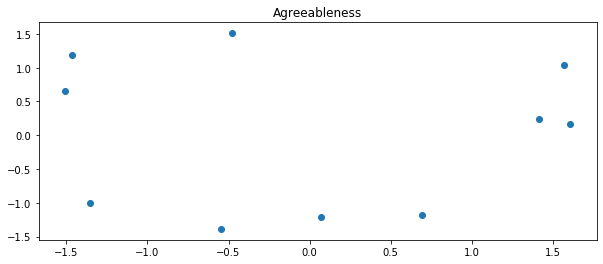

In [138]:
## Finding similarity between people based on agreeableness questions
## From the plot it can be inferred that the principal components has been able to reduce dimensionality of the data to get
## similar people together, considering just 10 data points, with more data we can look for further clustering approaches.
## The following present the cases of Agreeableness, Extrovertion and Conscientiousness.
## The similarity can be analysed by checking the points printed to the excel generated/response generated for each columns
## by the person under study

dfAgree = df[agreeablenessCols]
dfEncoded = pd.get_dummies(dfAgree)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(dfEncoded)

print('\n')
print("::: Principal Components :::")
print(principalComponents[:,0])
print(principalComponents[:,1])

fig, axes = plt.subplots(ncols=1, figsize=(10, 4))
axes.set_title('Agreeableness')
plt.scatter(principalComponents[:,0], principalComponents[:,1])

dfAgree.to_csv('agreeableness.csv')

               Am always prepared.      Leave my belongings around.  \
0              Moderately Accurate            Moderately Inaccurate   
1  Neither Accurate Nor Inaccurate                  Very Inaccurate   
2              Moderately Accurate                  Very Inaccurate   
3  Neither Accurate Nor Inaccurate              Moderately Accurate   
4  Neither Accurate Nor Inaccurate  Neither Accurate Nor Inaccurate   

         Pay attention to details.           Make a mess of things.  \
0  Neither Accurate Nor Inaccurate  Neither Accurate Nor Inaccurate   
1            Moderately Inaccurate                  Very Inaccurate   
2              Moderately Accurate            Moderately Inaccurate   
3              Moderately Accurate                  Very Inaccurate   
4  Neither Accurate Nor Inaccurate                  Very Inaccurate   

       Get chores done right away.  \
0              Moderately Accurate   
1                    Very Accurate   
2                  Very Inaccura

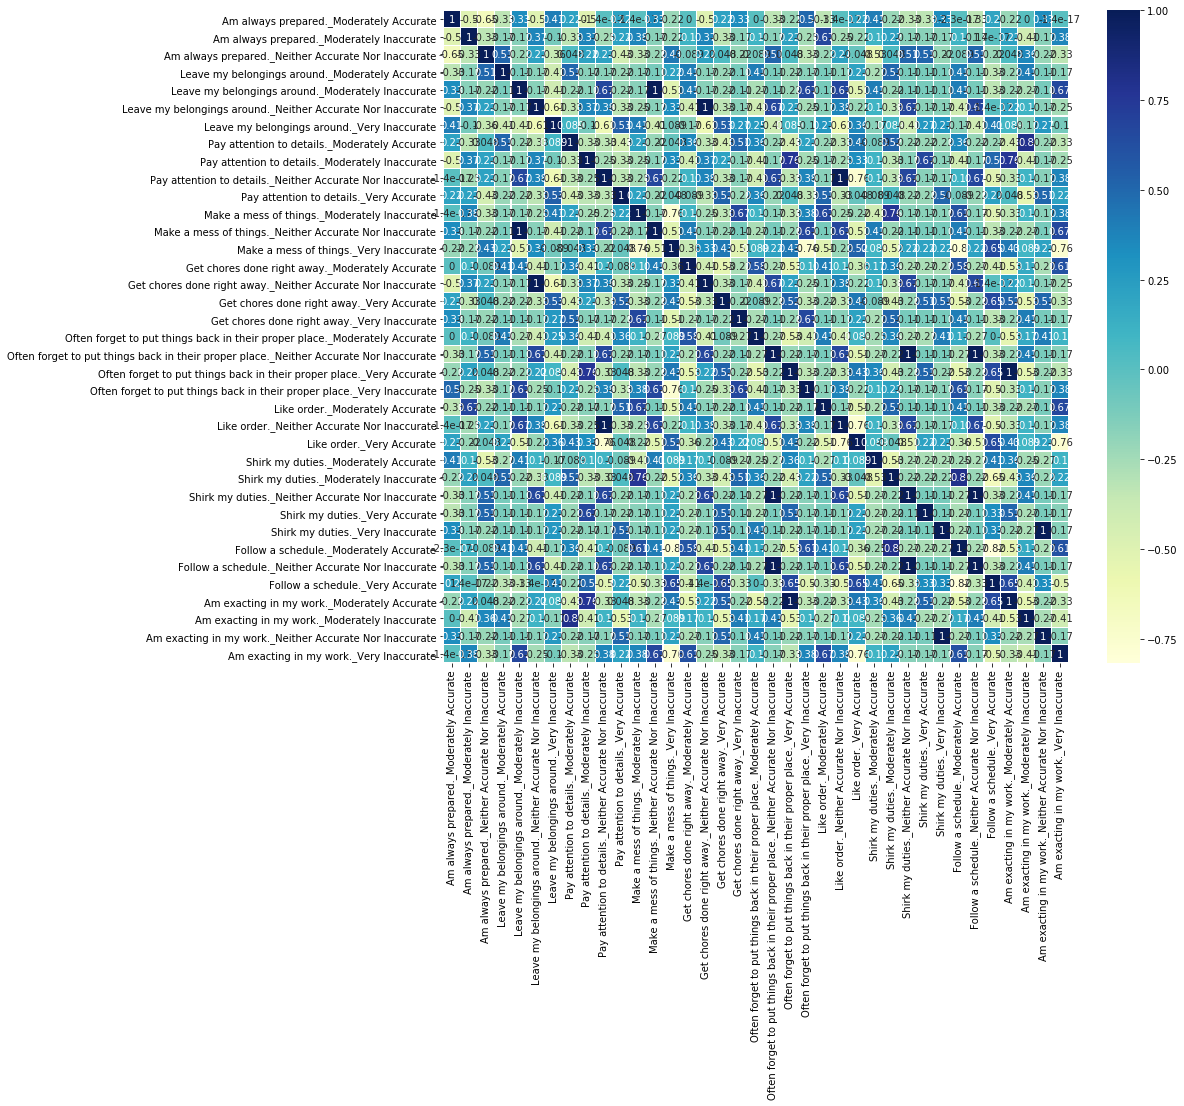

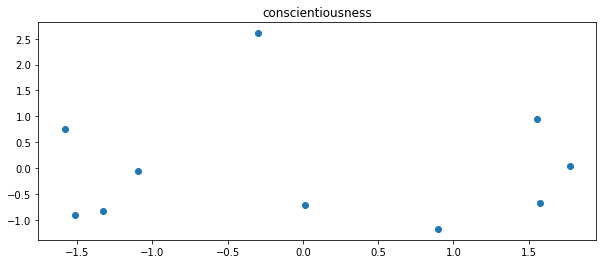

In [150]:
## Finding similarity betwee people based on conscientiousness questions
import seaborn as sns

dfCons = df[conscientiousness]
print(dfCons.head(5))
dfEncoded = pd.get_dummies(dfCons)
plt.figure(figsize=(14,12))
sns.heatmap(dfEncoded.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(dfEncoded)

print('\n')
print("::: Principal Components :::")
print(principalComponents[:,0])
print(principalComponents[:,1])

fig, axes = plt.subplots(ncols=1, figsize=(10, 4))
axes.set_title('conscientiousness')
plt.scatter(principalComponents[:,0], principalComponents[:,1])

dfCons.to_csv('conscientiousness.csv')



::: Principal Components :::
[-0.20855517  0.30197519 -0.83799352  1.75757022 -2.02536292 -0.83221193
  1.48453385 -1.86962698  2.05616076  0.17351048]
[-1.74090563 -1.61645431  0.97578629 -0.35309378  0.03947105 -0.47685098
  0.08236926  0.25384583  0.58785027  2.24798201]


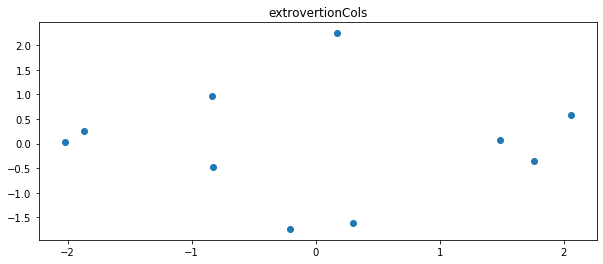

In [140]:
## Finding similarity between people based on extrovertion questions


dfExtr = df[extrovertionCols]
dfEncoded = pd.get_dummies(dfExtr)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(dfEncoded)

print('\n')
print("::: Principal Components :::")
print(principalComponents[:,0])
print(principalComponents[:,1])

fig, axes = plt.subplots(ncols=1, figsize=(10, 4))
axes.set_title('extrovertionCols')
plt.scatter(principalComponents[:,0], principalComponents[:,1])

dfExtr.to_csv('extrovertion.csv')

